In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cufflinks as cf
from IPython.display import display, HTML
cf.set_config_file(sharing='public', theme='ggplot', offline=True)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import pandas as pd

imdb = pd.read_csv("/content/drive/MyDrive/dataset/imdb.csv")

imdb['release_year'] = imdb['release_year'].str.replace("(", "").str.replace(")", "").str.replace("I", "")
imdb['release_year'] = imdb['release_year'].astype(int)


In [ ]:
print(imdb.head())

                      title              director  release_year  runtime  \
0  The Shawshank Redemption        Frank Darabont          1994  142 min   
1             The Godfather  Francis Ford Coppola          1972  175 min   
2           The Dark Knight     Christopher Nolan          2008  152 min   
3          Schindler's List      Steven Spielberg          1993  195 min   
4              12 Angry Men          Sidney Lumet          1957   96 min   

                       genre  rating  metascore     gross  
0                      Drama     9.3         82   $28.34M  
1               Crime, Drama     9.2        100  $134.97M  
2       Action, Crime, Drama     9.0         84  $534.86M  
3  Biography, Drama, History     9.0         95   $96.90M  
4               Crime, Drama     9.0         97    $4.36M  


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import cufflinks as cf
from IPython.display import display,HTML
cf.set_config_file(sharing = 'public', theme = 'ggplot', offline = True)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


In [ ]:
import pandas as pd

imdb = pd.read_csv("/content/drive/MyDrive/dataset/imdb.csv")

imdb['release_year'] = imdb['release_year'].str.replace("(", "").str.replace(")", "").str.replace("I", "")
imdb['release_year'] = imdb['release_year'].astype(int)

imdb['gross'] = imdb['gross'].str.replace("$", "").str.replace("M", "").astype(float)
imdb = imdb.rename(columns={'gross':'gross(M)'})

imdb['runtime'] = imdb['runtime'].str.replace("min", "").astype(int)

imdb['genre'] = imdb['genre'].str.split(', ')
imdb = imdb.explode('genre')

imdb2 = imdb.drop_duplicates('title')


In [ ]:
print(imdb.head())
print(imdb2.head())

                      title              director  release_year  runtime  \
0  The Shawshank Redemption        Frank Darabont          1994      142   
1             The Godfather  Francis Ford Coppola          1972      175   
1             The Godfather  Francis Ford Coppola          1972      175   
2           The Dark Knight     Christopher Nolan          2008      152   
2           The Dark Knight     Christopher Nolan          2008      152   

    genre  rating  metascore  gross(M)  
0   Drama     9.3         82     28.34  
1   Crime     9.2        100    134.97  
1   Drama     9.2        100    134.97  
2  Action     9.0         84    534.86  
2   Crime     9.0         84    534.86  
                      title              director  release_year  runtime  \
0  The Shawshank Redemption        Frank Darabont          1994      142   
1             The Godfather  Francis Ford Coppola          1972      175   
2           The Dark Knight     Christopher Nolan          2008      

In [ ]:
imdb_clean = imdb[(imdb['metascore'] !=0) & (imdb['gross(M)'] !=0)]
imdb2_clean = imdb2[(imdb2['metascore'] !=0) & (imdb2['gross(M)'] !=0)]
imdb_clean
imdb_clean
imdb2_clean


,title,director,release_year,runtime,genre,rating,metascore,gross(M)
0,The Shawshank Redemption,Frank Darabont,1994,142,Drama,9.3,82,28.34
1,The Godfather,Francis Ford Coppola,1972,175,Crime,9.2,100,134.97
2,The Dark Knight,Christopher Nolan,2008,152,Action,9.0,84,534.86
3,Schindler's List,Steven Spielberg,1993,195,Biography,9.0,95,96.90
4,12 Angry Men,Sidney Lumet,1957,96,Crime,9.0,97,4.36
...,...,...,...,...,...,...,...,...
993,The Taking of Pelham One Two Three,Joseph Sargent,1974,104,Action,7.6,68,2.49
994,Control,Anton Corbijn,2007,122,Biography,7.6,78,0.87
995,A Very Long Engagement,Jean-Pierre Jeunet,2004,133,Drama,7.6,76,6.17
996,Shine,Scott Hicks,1996,105,Biography,7.6,87,35.81


<ipython-input-14-13e3fd8b4880>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




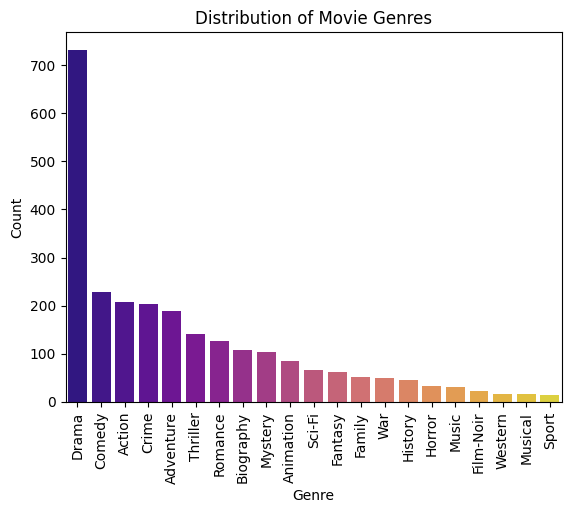

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
#count plot to show distribution of mvies by genre
genre_counts = imdb['genre'].value_counts()
sorted_genres = genre_counts.sort_values(ascending=False).index
color_palette = sns.color_palette("plasma", n_colors=len(sorted_genres))
sns.countplot(data=imdb, x='genre', order=sorted_genres, palette=color_palette)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Distribution of Movie Genres')
plt.xticks(rotation=90) #x-axis labels rotated by 90deg to avoid overlapping
plt.show()


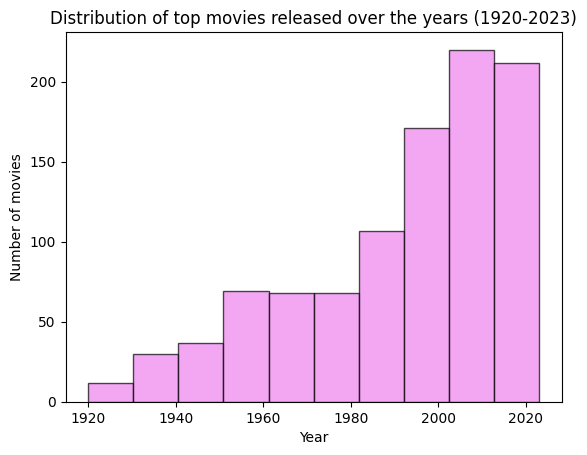

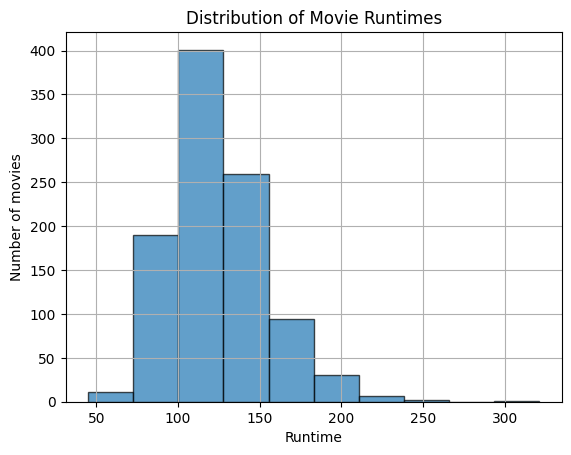

In [ ]:
import matplotlib.pyplot as plt

# Histogram for release year
plt.hist(imdb2['release_year'], bins=10, color='violet', edgecolor='black', alpha=0.7)
plt.xlabel('Year')
plt.ylabel('Number of movies')
plt.title('Distribution of top movies released over the years (1920-2023)')
plt.show()

# Histogram for runtime
plt.hist(imdb2['runtime'], bins=10, edgecolor='black', alpha=0.7)
plt.xlabel('Runtime')
plt.ylabel('Number of movies')
plt.title('Distribution of Movie Runtimes')
plt.grid(True)
plt.show()


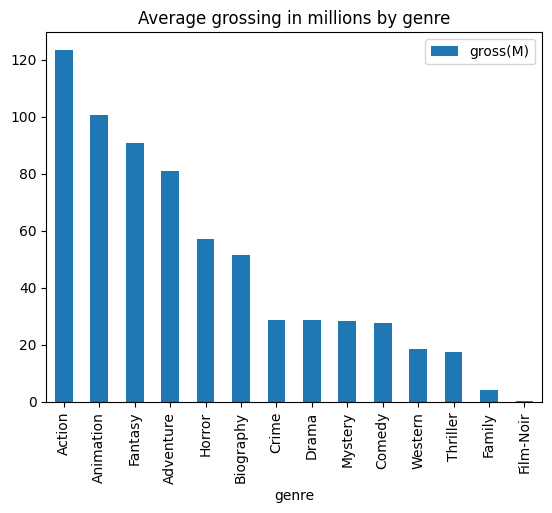

In [ ]:
sorted_genre_avg_gross = imdb2.pivot_table(values = 'gross(M)', index = 'genre').sort_values(by = 'gross(M)', ascending = False)
sorted_genre_avg_gross.plot(kind = 'bar', title = 'Average grossing in millions by genre')
plt.show()
# genre_counts = imdb['genre'].value_counts()
# sorted_genres = genre_counts.sort_values(ascending=False).index
# color_palette = sns.color_palette("viridis", n_colors=len(sorted_genres))
# sns.countplot(data=imdb, x='genre', order=sorted_genres, palette=color_palette)
# plt.xlabel('Genre')
# plt.ylabel('Count')
# plt.title('Distribution of Movie Genres')
# plt.xticks(rotation = 90)
# plt.show()

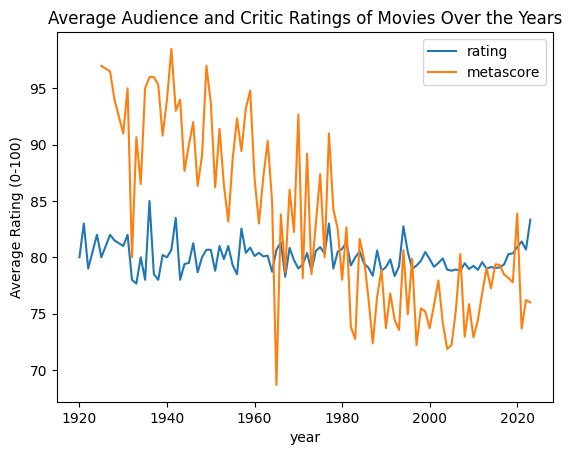

In [ ]:
# convert 'rating' column to the same scale as 'metascore'
imdb2['rating'] = imdb2['rating'] * 10

plt.plot('rating',data = imdb2.groupby('release_year')[['rating','metascore']].mean())
plt.plot('metascore', data = imdb2[imdb2['metascore']!=0].groupby('release_year')[['rating','metascore']].mean())
plt.xlabel('year')
plt.ylabel('Average Rating (0-100)')
plt.title('Average Audience and Critic Ratings of Movies Over the Years')
plt.legend()
plt.show()

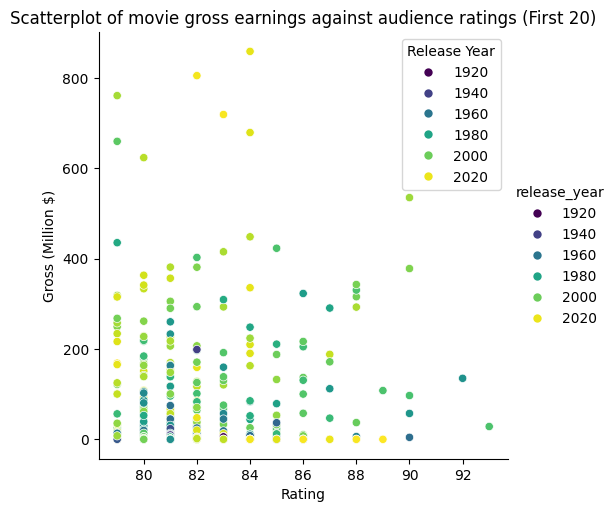

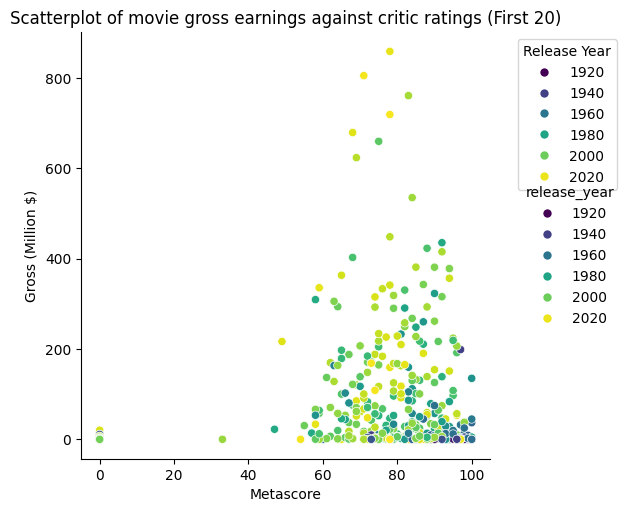

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatterplot: Rating against gross for the first 20 data points, colored by release year
sns.relplot(x='rating', y='gross(M)', hue='release_year', data=imdb2.head(500), kind='scatter', palette='viridis')
plt.title('Scatterplot of movie gross earnings against audience ratings (First 20)')
plt.xlabel('Rating')
plt.ylabel('Gross (Million $)')
plt.legend(title='Release Year')
plt.show()

# Scatterplot: Metascore against gross for the first 20 data points, colored by release year
sns.relplot(x='metascore', y='gross(M)', hue='release_year', data=imdb2.head(500), kind='scatter', palette='viridis')
plt.title('Scatterplot of movie gross earnings against critic ratings (First 20)')
plt.xlabel('Metascore')
plt.ylabel('Gross (Million $)')
plt.legend(title='Release Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

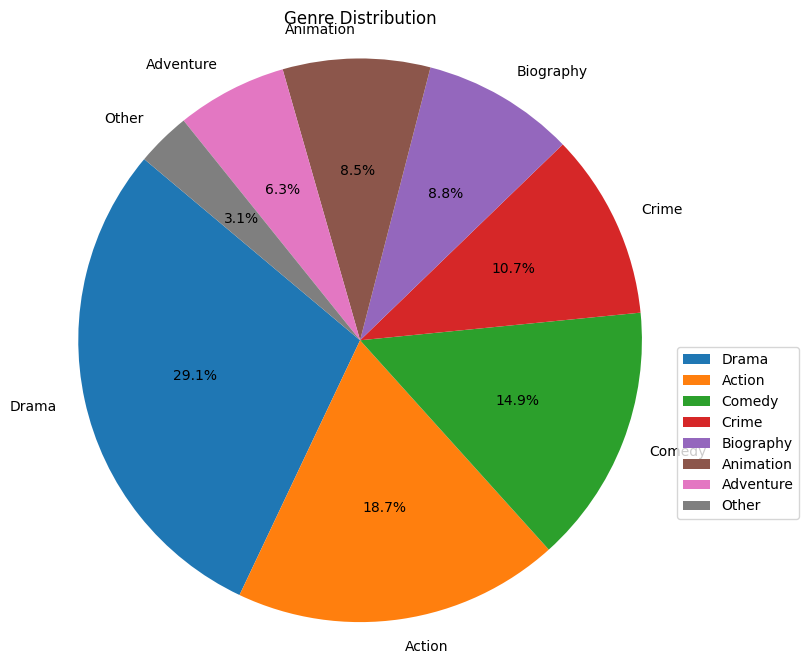

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Determine threshold for displaying genres
threshold = 0.05  # Adjust as needed

# Calculate genre counts
genre_counts = imdb2['genre'].value_counts(normalize=True)

# Group less frequent genres into an "Other" category
other_genre_count = genre_counts[genre_counts < threshold].sum()
genre_counts = genre_counts[genre_counts >= threshold]
genre_counts['Other'] = other_genre_count

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Genre Distribution')
plt.axis('equal')  # aspect ratio, equal

# Add legend outside the pie chart
plt.legend(genre_counts.index, loc='upper left', bbox_to_anchor=(1, 0.5))

plt.show()


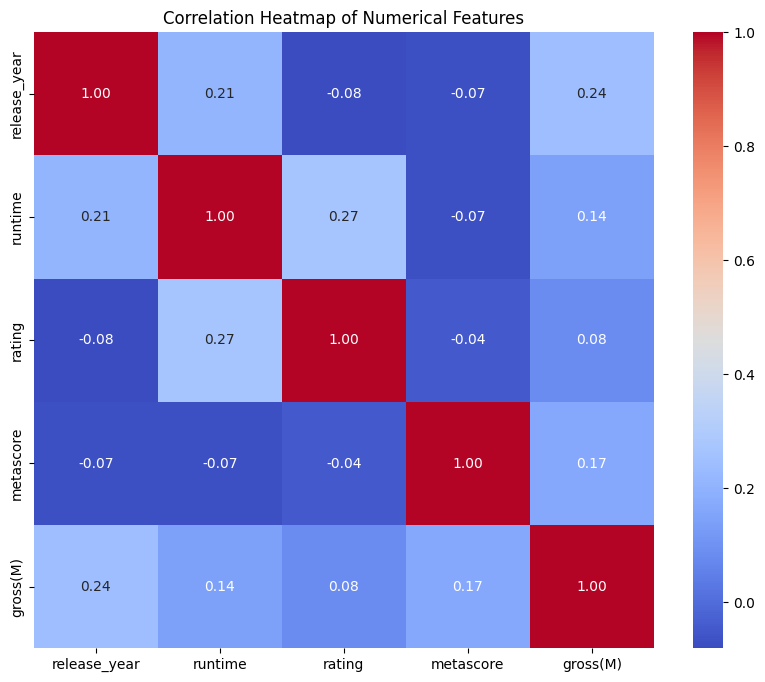

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming imdb2 is defined as a DataFrame earlier in your code

# Select only numerical columns for correlation calculation
numeric_columns = imdb2.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numeric_columns.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


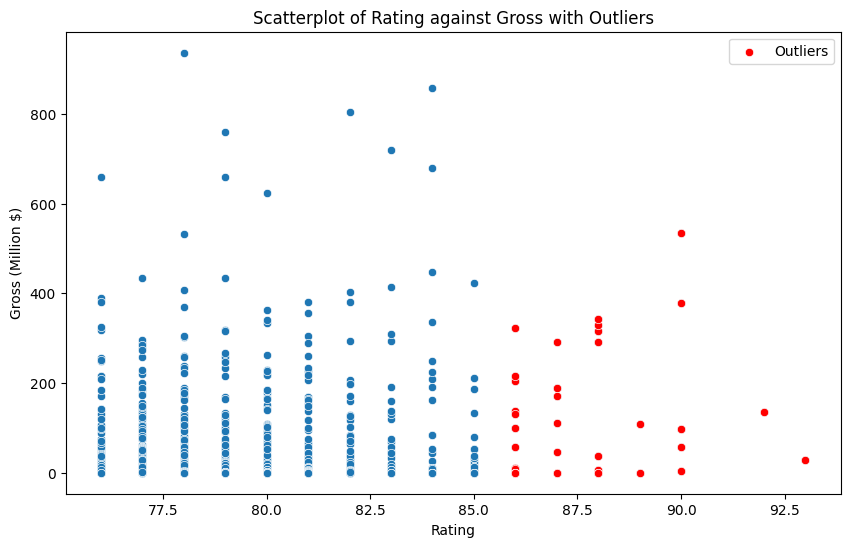

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate summary statistics for the 'rating' variable
rating_stats = imdb2['rating'].describe()

# Define thresholds based on summary statistics
upper_threshold = rating_stats['75%'] + 1.5 * (rating_stats['75%'] - rating_stats['25%'])
lower_threshold = rating_stats['25%'] - 1.5 * (rating_stats['75%'] - rating_stats['25%'])

# Create scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='rating', y='gross(M)', data=imdb2)

# Highlight outliers
outliers = imdb2[(imdb2['rating'] < lower_threshold) | (imdb2['rating'] > upper_threshold)]
sns.scatterplot(x='rating', y='gross(M)', data=outliers, color='red', label='Outliers')

plt.title('Scatterplot of Rating against Gross with Outliers')
plt.xlabel('Rating')
plt.ylabel('Gross (Million $)')
plt.legend()
plt.show()


In [ ]:
unique_genres = imdb['genre'].unique()
print(unique_genres)
genre_counts = imdb['genre'].value_counts()
print(genre_counts)



['Drama' 'Crime' 'Action' 'Biography' 'History' 'Adventure' 'Animation'
 'Sci-Fi' 'Romance' 'Western' 'Mystery' 'Comedy' 'Fantasy' 'War'
 'Thriller' 'Family' 'Horror' 'Music' 'Film-Noir' 'Musical' 'Sport']
genre
Drama        732
Comedy       229
Action       207
Crime        204
Adventure    189
Thriller     141
Romance      126
Biography    107
Mystery      103
Animation     84
Sci-Fi        67
Fantasy       62
Family        52
War           50
History       45
Horror        33
Music         31
Film-Noir     22
Western       17
Musical       16
Sport         15
Name: count, dtype: int64
